### QLD Votes 2020

looking at the swings that happened last election

In [393]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd
import pickle

In [394]:
### import the position codes for our hextiles graph
hex2020 = pd.read_csv('Q2020hextiles.csv')

In [395]:
df2017 = pd.read_pickle("./2017_2PP_seats.pkl")
swing2017 = df2017[['Seat','winning party', 'winning pc']]

In [396]:
df2015 = pd.read_pickle("./2015_2PP_seats.pkl")
swing2015 = df2015[['Seat','winning party', 'winning pc']]

In [397]:
# some seats now have different names , scrapped etc
# this cell deals with that
# this is the readon for the gaps in the 2015 map

# note that some seats at end were abolished, but became the 2017 equiv. the last two were more or less replacements

names2017 = ['cooper','scenic rim','mcconnel','oodgeroo','maiwar', 'kurwongbah','traeger', 'toohey', 'miller', 'macalister','hill',]
names2015 = ['ashgrove','beaudesert','brisbane central','cleveland','indooroopilly', 'kallangur','mount isa', 'sunnybank', 'yeerongpilly','albert','dalrymple',]
for i in range(len(names2017)):
    swing2015['Seat'] = swing2015['Seat'].replace([names2015[i]],names2017[i])
    
# mount coot-tha is an out and out land grab on a space that didnt exist in 2017  

names2017 = ['aspley']
names2015 = ['mount coot-tha']
for i in range(len(names2017)):
    swing2015['Seat'] = swing2015['Seat'].replace([names2017[i]],names2015[i])

# these are new seats from 2017
todroplist = ['bancroft', 'bonney', 'jordan', 'ninderry', 'theodore']
for i in todroplist:
    todrop = swing2015.loc[swing2015['Seat']==i].index
    swing2015.drop(todrop, inplace=True)

swing2015.shape    #88,3

c:\users\jack\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\jack\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\jack\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

(89, 3)

In [398]:
swing2015.rename(columns={'Seat': 'Seat', 'winning party': 'winning party 2015', 'winning pc': 'winning pc 2015'}, inplace=True)

c:\users\jack\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [399]:
swingdf = swing2017.merge(swing2015, how="left")

swingdf['winning pc 2015'] = swingdf['winning pc 2015'].fillna("0")
swingdf['winning party 2015'] = swingdf['winning party 2015'].fillna('--')

## SEATS THAT CHANGED HANDS

In [401]:
swingdf['seat retained'] = np.where(swingdf['winning party'] == swingdf['winning party 2015'],"Y","N")

In [402]:
t = []
for i, point in swingdf.iterrows(): 
    
    x = point['winning party']
    y = point['winning party 2015']
    
    if y ==  '--':
        color = 'lightgray'
                   
    elif x == y:
        color = 'lightgray'
        
    elif x == "ALP":
        color = 'tomato'
        
    elif x == "LNP":
        color = 'deepskyblue'
        
    elif x == "KAP":
        color = 'khaki'
        
    elif x == "GRN":
        color = 'springgreen'
       
    t.append(color)

swingdf['colorSR'] = t

In [404]:
swingdf = swingdf.merge(hex2020, how="left")

([], <a list of 0 Text major ticklabel objects>)

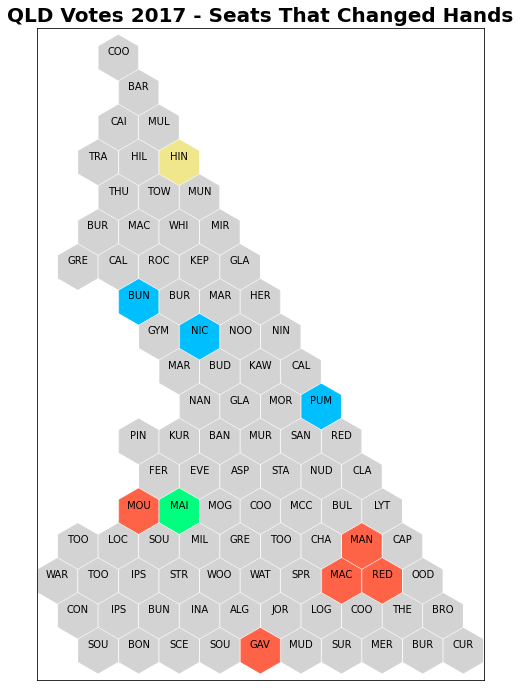

In [405]:
fig, ax = plt.subplots()
plt.title('QLD Votes 2017 - Seats That Changed Hands', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['colorSR'], )

for i, point in swingdf.iterrows():                
        #plt.text(point['x'], point['y']-0.05, point['swing'],ha="center", va="center", weight="bold")
        plt.text(point['x'], point['y']+0.05, point['Seat'][0:3].upper(),ha="center", va="center")
        
plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

## SWINGS TOWARDS LABOR

In [407]:
t = []

for i, point in swingdf.iterrows():
    
    if point['winning party 2015'] == "--":
        swingALP = '--'
        
    else:
        
        if point['winning party'] == 'ALP':
            now = float(point['winning pc'])
            
        else:
            now = 100.0 - float(point['winning pc'])
                     
        if point['winning party 2015'] == 'ALP':
                then = float(point['winning pc 2015'])
        else:
                then = 100.0 - float(point['winning pc 2015'])
            
        swingALP = round(now - then,2)
                
    t.append(swingALP)

swingdf['swingALP'] = t

In [409]:
r = []

for i in t: 
        
    if i ==  '--':
        color = 'lightgrey'
                   
    elif i == 0:
        color = 'white'
        
    elif i > 8:
        color = 'darkred'
        
    elif i > 4:
        color = 'tomato'
        
    elif i > 0:
        color = 'salmon'
        
    elif i < -8:
        color = 'navy'
        
    elif i < -4:
        color = 'deepskyblue'
        
    elif i < 0:
        color = 'lightsteelblue'
       
    r.append(color)

swingdf['colorSwingALP'] = r

([], <a list of 0 Text major ticklabel objects>)

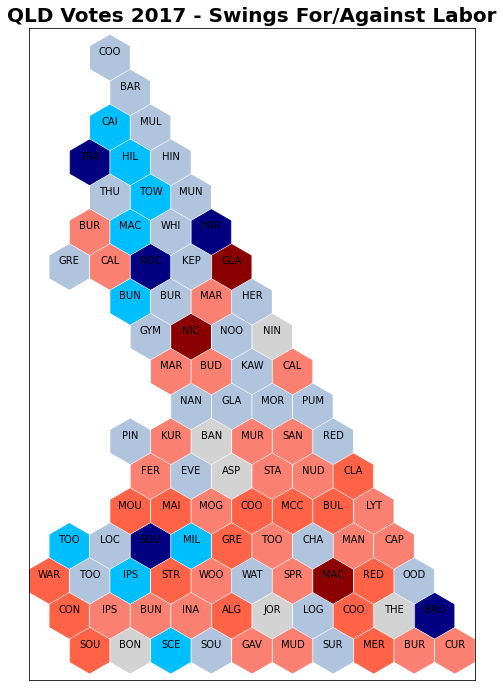

In [411]:
fig, ax = plt.subplots()
plt.title('QLD Votes 2017 - Swings For/Against Labor', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['colorSwingALP'], )

for i, point in swingdf.iterrows():                
        #plt.text(point['x'], point['y']-0.05, point['swing'],ha="center", va="center", weight="bold")
        plt.text(point['x'], point['y']+0.05, point['Seat'][0:3].upper(),ha="center", va="center")
        
plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

### SWINGING SEATS 2017 v 2015

In [413]:
### set colors for 2017

swingdf['winning pc'] = pd.to_numeric(swingdf['winning pc'], errors='coerce')

r = []

for i, point in swingdf.iterrows():
    
    if point['winning party'] == "ALP":
        
        if point['winning pc'] > 60:
            color = 'darkred'
         
        elif point['winning pc'] > 55:
            color = 'tomato'
            
        elif point['winning pc'] > 50:
            color = 'salmon'

        
    if point['winning party'] == "LNP":
        
        if point['winning pc'] > 60:
            color = 'navy'
         
        elif point['winning pc'] > 55:
            color = 'deepskyblue'
            
        elif point['winning pc'] > 50:
            color = 'lightsteelblue'
        
    if point['winning party'] == "GRN":
        color = 'springgreen'
        
    if point['winning party'] == "KAP":
        color = 'khaki'
    
    r.append(color)

swingdf['color2017'] = r

In [429]:
### set colors for 2015

swingdf['winning pc 2015'] = pd.to_numeric(swingdf['winning pc 2015'], errors='coerce')

s = []

for i, point in swingdf.iterrows():
    
    if point['winning party 2015'] == "ALP":
        
        if point['winning pc 2015'] > 60:
            color = 'darkred'
         
        elif point['winning pc 2015'] > 55:
            color = 'tomato'
            
        elif point['winning pc 2015'] > 50:
            color = 'salmon'

        
    if point['winning party 2015'] == "LNP":
        
        if point['winning pc 2015'] > 60:
            color = 'navy'
         
        elif point['winning pc 2015'] > 55:
            color = 'deepskyblue'
            
        elif point['winning pc 2015'] > 50:
            color = 'lightsteelblue'
        
    if point['winning party 2015'] == "GRN":
        color = 'springgreen'
        
    if point['winning party 2015'] == "KAP":
        color = 'khaki'
        
    if point['winning party 2015'] == "--":
        color = 'lightgray'
    
    s.append(color)

swingdf['color2015'] = s

([], <a list of 0 Text major ticklabel objects>)

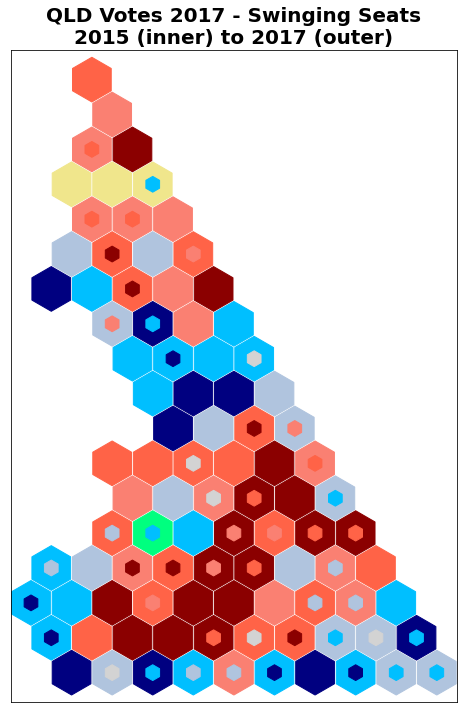

In [430]:
fig, ax = plt.subplots()
plt.title('QLD Votes 2017 - Swinging Seats\n2015 (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['color2017'], )

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=250, c=swingdf['color2015'], )

plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

In [431]:
swingdf[['Seat','color2017','color2015']]

,Seat,color2017,color2015
0,algester,darkred,tomato
1,aspley,salmon,lightgray
2,bancroft,tomato,lightgray
3,barron river,salmon,salmon
4,bonney,lightsteelblue,lightgray
...,...,...,...
88,traeger,khaki,khaki
89,warrego,deepskyblue,navy
90,waterford,darkred,darkred
91,whitsunday,lightsteelblue,lightsteelblue


# STAND VIEW OF SWING PER WINNING PARTY PER SEAT

In [442]:
t = []
for i, point in swingdf.iterrows():
    
    if point['winning party 2015'] == "--":
        
        t.append('--')
        
    else:
            
        now = float(point['winning pc'])
            
        if point['seat retained'] == "Y":
            then = float(point['winning pc 2015'])
                
        elif point['seat retained'] == "N":
            then = 100.0 - float(point['winning pc 2015'])
                
    t.append(round(now - then,2))

swingdf['swing'] = t

ValueError: Length of values does not match length of index

In [438]:
swingdf.head(40)

,Seat,winning party,winning pc,winning party 2015,winning pc 2015,seat retained,colorSR,x,y,swingALP,colorSwingALP,color2017,color2015,swing,colorSwingGeneral
0,algester,ALP,64.43,ALP,56.99,Y,lightgray,18.5,2.2,7.44,tomato,darkred,tomato,tbc,tomato
1,aspley,ALP,51.17,--,0.00,N,lightgray,18.5,3.4,--,lightgrey,salmon,lightgray,tbc,tomato
2,bancroft,ALP,56.21,--,0.00,N,lightgray,17.0,3.7,--,lightgrey,tomato,lightgray,tbc,tomato
3,barron river,ALP,51.86,ALP,53.12,Y,lightgray,11.0,6.7,-1.26,lightsteelblue,salmon,salmon,tbc,tomato
4,bonney,LNP,51.69,--,0.00,N,lightgray,11.0,1.9,--,lightgrey,lightsteelblue,lightgray,tbc,deepskyblue
5,broadwater,LNP,67.98,LNP,57.19,Y,lightgray,33.5,2.2,-10.79,navy,navy,deepskyblue,tbc,deepskyblue
6,buderim,LNP,61.41,LNP,62.16,Y,lightgray,17.0,4.3,0.75,salmon,navy,navy,tbc,deepskyblue
7,bulimba,ALP,60.78,ALP,56.14,Y,lightgray,26.0,3.1,4.64,tomato,darkred,tomato,tbc,tomato
8,bundaberg,LNP,54.20,ALP,51.62,N,deepskyblue,11.0,4.9,-5.82,deepskyblue,lightsteelblue,salmon,tbc,deepskyblue
9,bundamba,ALP,71.55,ALP,71.43,Y,lightgray,12.5,2.2,0.12,salmon,darkred,darkred,tbc,tomato


In [434]:
swingdf['colorSwingGeneral'] = np.where(swingdf['winning party'] == 'ALP', 'tomato', np.where(swingdf['winning party'] == 'GRN', 'springgreen', np.where(swingdf['winning party'] == 'KAP', 'lightgrey', 'deepskyblue')))

In [435]:
swingdf

,Seat,winning party,winning pc,winning party 2015,winning pc 2015,seat retained,colorSR,x,y,swingALP,colorSwingALP,color2017,color2015,swing,colorSwingGeneral
0,algester,ALP,64.43,ALP,56.99,Y,lightgray,18.5,2.2,7.44,tomato,darkred,tomato,tbc,tomato
1,aspley,ALP,51.17,--,0.00,N,lightgray,18.5,3.4,--,lightgrey,salmon,lightgray,tbc,tomato
2,bancroft,ALP,56.21,--,0.00,N,lightgray,17.0,3.7,--,lightgrey,tomato,lightgray,tbc,tomato
3,barron river,ALP,51.86,ALP,53.12,Y,lightgray,11.0,6.7,-1.26,lightsteelblue,salmon,salmon,tbc,tomato
4,bonney,LNP,51.69,--,0.00,N,lightgray,11.0,1.9,--,lightgrey,lightsteelblue,lightgray,tbc,deepskyblue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,traeger,KAP,78.49,KAP,65.19,Y,lightgray,8.0,6.1,-13.3,navy,khaki,khaki,tbc,lightgrey
89,warrego,LNP,59.46,LNP,65.43,Y,lightgray,5.0,2.5,5.97,tomato,deepskyblue,navy,tbc,deepskyblue
90,waterford,ALP,60.75,ALP,63.33,Y,lightgray,20.0,2.5,-2.58,lightsteelblue,darkred,darkred,tbc,tomato
91,whitsunday,LNP,50.68,LNP,50.38,Y,lightgray,14.0,5.5,-0.3,lightsteelblue,lightsteelblue,lightsteelblue,tbc,deepskyblue


In [214]:
# Now to map the swing

([], <a list of 0 Text major ticklabel objects>)

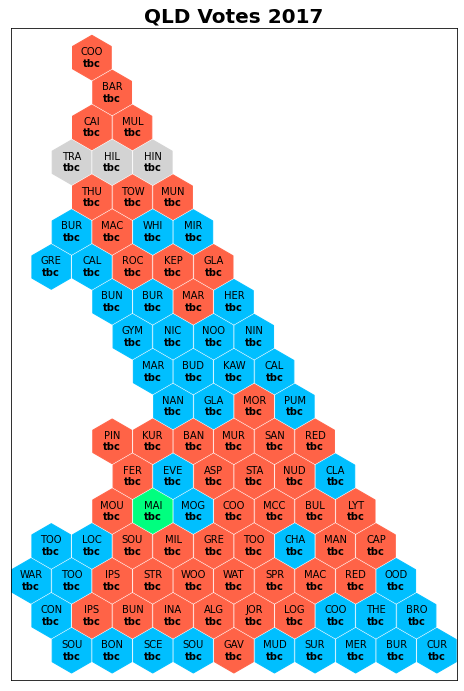

In [436]:

swingdf = swingdf.merge(hex2020, how="left")

fig, ax = plt.subplots()
plt.title('QLD Votes 2017', fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['colorSwingGeneral'], )
for i, point in swingdf.iterrows():                
        plt.text(point['x'], point['y']-0.05, point['swing'],ha="center", va="center", weight="bold")
        plt.text(point['x'], point['y']+0.05, point['Seat'][0:3].upper(),ha="center", va="center")
plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])